In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


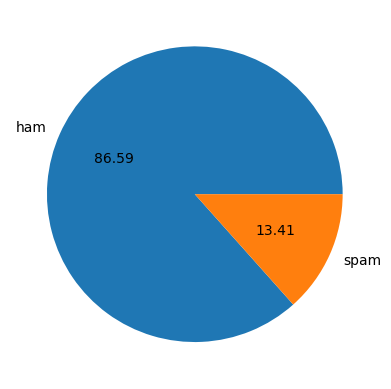

In [6]:
import matplotlib.pyplot as plt
plt.pie(mail_data['Category'].value_counts() , labels =['ham' ,'spam'],autopct="%0.2f")
plt.show()

In [7]:
import seaborn as sns

In [8]:
mail_data.shape

(5572, 2)

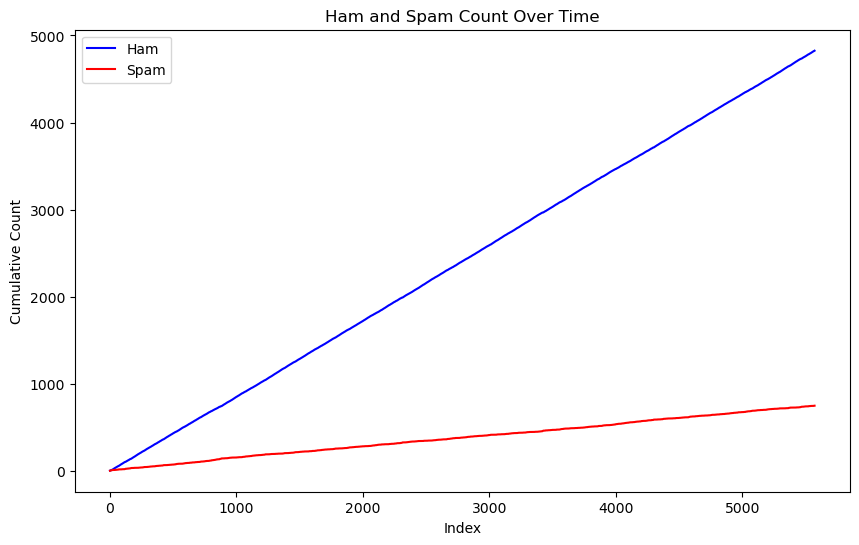

In [9]:
grouped_data = mail_data.groupby('Category').cumcount()
ham_counts = (mail_data['Category'] == 'ham').cumsum()
spam_counts = (mail_data['Category'] == 'spam').cumsum()
plt.figure(figsize=(10, 6))
plt.plot(ham_counts.index, ham_counts, label='Ham', color='blue')
plt.plot(spam_counts.index, spam_counts, label='Spam', color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Count')
plt.title('Ham and Spam Count Over Time')
plt.legend()

plt.show()

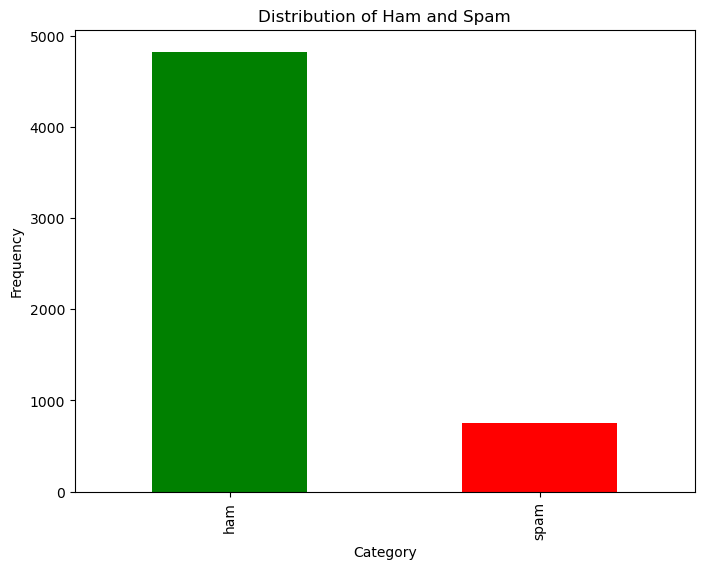

In [10]:
plt.figure(figsize=(8, 6))
mail_data['Category'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Ham and Spam')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [11]:
X = mail_data['Message']

Y = mail_data['Category']

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [14]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [15]:
print(Y)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [18]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [19]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.transform(Y_test)


In [20]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [21]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [22]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train_features, Y_train)
prediction_on_training_data = model1.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)
prediction_on_test_data = model1.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on training data :  0.9807045097599282
Accuracy on test data :  0.9730941704035875


In [23]:
from sklearn.tree import DecisionTreeClassifier
model2 =DecisionTreeClassifier()
model2.fit(X_train_features, Y_train)
print("DecisionTreeClassifier")
prediction_on_training_data = model2.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

prediction_on_test_data = model2.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

DecisionTreeClassifier
Accuracy on training data :  1.0
Accuracy on test data :  0.9668161434977578


In [24]:
from sklearn.ensemble import RandomForestClassifier

model3 =RandomForestClassifier()
model3.fit(X_train_features, Y_train)
print("randomforestclassifier")
prediction_on_training_data = model3.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

prediction_on_test_data = model3.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

randomforestclassifier
Accuracy on training data :  1.0
Accuracy on test data :  0.9748878923766816


In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [27]:

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [28]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [29]:

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [30]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


In [31]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail)



prediction = model3.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


In [32]:
import  pickle

In [33]:
pickle.dump(model,open('spam.pkl','wb'))
modell=pickle.load(open('spam.pkl','rb'))


In [34]:
pickle.dump(feature_extraction,open('vector.pkl','wb'))
vector=pickle.load(open('vector.pkl','rb'))
